# Import Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Question 1: Exploratory Data Analysis

In [114]:
# Load the data from the csv file
data = pd.read_csv("gnjoroge\\data\\Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [115]:
# View the structural metadata of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [116]:
# Clean up column names by removing leading and trailing spaces
data.columns = (
    data.columns
    .str.strip()
)


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [118]:
# View the summary statistics for the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [119]:
# Calculating the yearly life expectancy for developing and developed countries
# Grouping columns
columns = ["Year", "Status"]
yearly_life_expectancy = data.groupby(columns)["Life expectancy"].mean().reset_index()
yearly_life_expectancy.head()

,Year,Status,Life expectancy
0,2000,Developed,76.803125
1,2000,Developing,64.619868
2,2001,Developed,77.128125
3,2001,Developing,65.009934
4,2002,Developed,77.546875


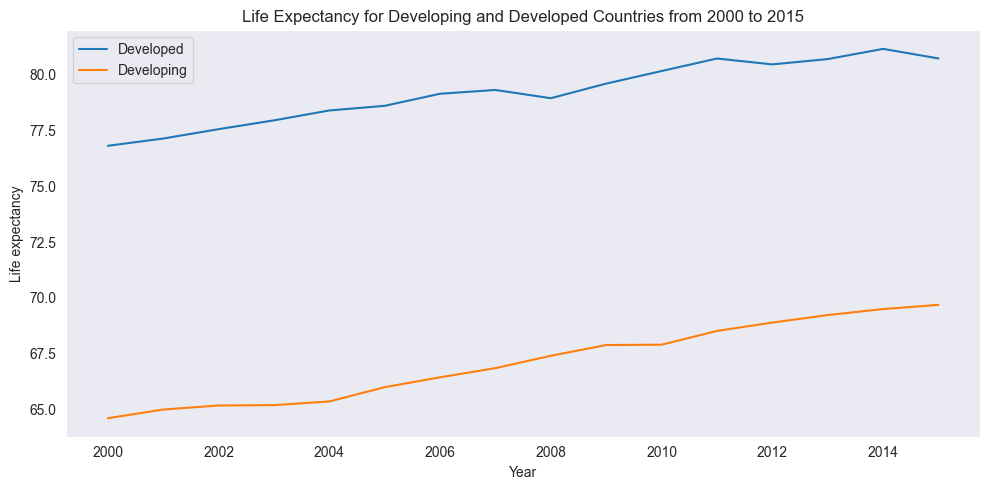

In [120]:
# Plotting the yearly life expectancy trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_life_expectancy,
             x="Year",
             y="Life expectancy",
             hue="Status")
plt.title("Life Expectancy for Developing and Developed Countries from 2000 to 2015")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Question 2: Data Cleaning

In [121]:
# Missing value proportions per variable
data.isna().mean().sort_values(ascending=False)

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
BMI                                0.011572
Diphtheria                         0.006467
Polio                              0.006467
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Status                             0.000000
Country                            0.000000
Year                               0.000000
under-five deaths                  0.000000
Measles                            0.000000
percentage expenditure             0.000000
HIV/AIDS                           0.000000
dtype: float64

In [122]:
# Population has the largest proportion at 22% missing values
# Filling in missing values using median
median_imputed_data = data["Population"].fillna(data["Population"].median())
print("Median Imputed Data")
print(median_imputed_data.describe())

# Filling in missing values using KNN Imputation
# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
# Select numeric columns
numeric_data = data.select_dtypes(include=["float64", "int64"])
# Impute missing values
knn_imputed_df = pd.DataFrame(knn_imputer.fit_transform(numeric_data), columns=numeric_data.columns)
knn_imputed_data = knn_imputed_df["Population"]
print("\nKNN Imputed Data")
print(knn_imputed_data.describe())


Median Imputed Data
count    2.938000e+03
mean     1.023085e+07
std      5.402242e+07
min      3.400000e+01
25%      4.189172e+05
50%      1.386542e+06
75%      4.584371e+06
max      1.293859e+09
Name: Population, dtype: float64

KNN Imputed Data
count    2.938000e+03
mean     1.211352e+07
std      5.546108e+07
min      3.400000e+01
25%      3.570380e+05
50%      1.952342e+06
75%      8.117433e+06
max      1.293859e+09
Name: Population, dtype: float64


In [123]:
print(median_imputed_data)

0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: Population, Length: 2938, dtype: float64


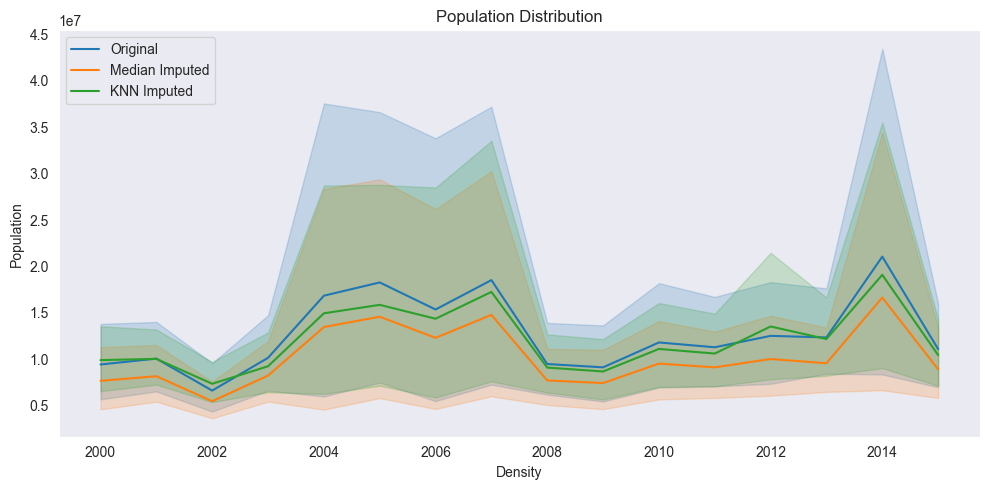

In [124]:
# Plotting the values to visualize the distributions
plt.figure(figsize=(10, 5))
sns.lineplot(x=data["Year"], y=data["Population"], label="Original")
sns.lineplot(x=data["Year"], y=median_imputed_data, label="Median Imputed")
sns.lineplot(x=data["Year"], y=knn_imputed_data, label="KNN Imputed")
plt.title("Population Distribution")
plt.xlabel("Density")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

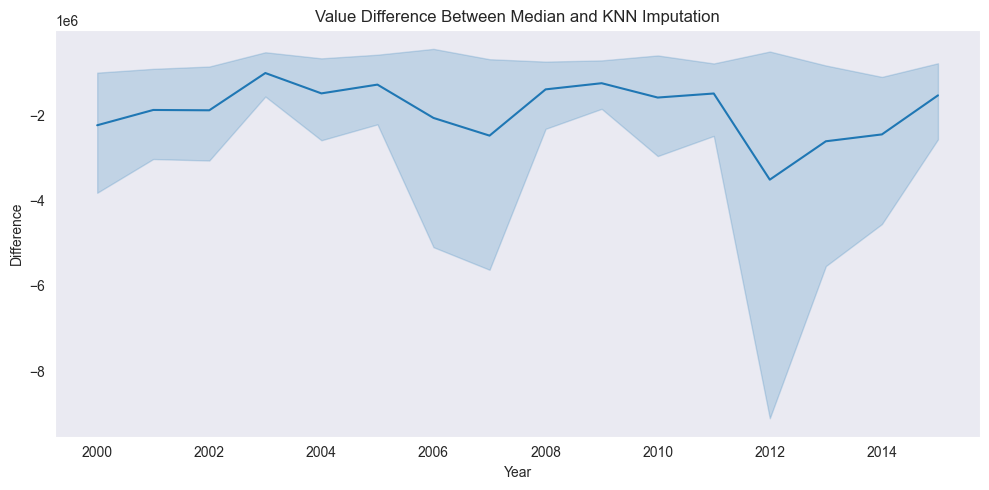

In [125]:
# Plotting the value differences to visualize the distributions
plt.figure(figsize=(10, 5))
sns.lineplot(x=data["Year"], y=median_imputed_data - knn_imputed_data)
plt.title("Value Difference Between Median and KNN Imputation")
plt.xlabel("Year")
plt.ylabel("Difference")
plt.grid()
plt.tight_layout()
plt.show()

In [126]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [127]:
# Applying KNN Imputation to the numerical columns
data[numeric_data.columns.tolist()] = knn_imputed_df
data.isna().sum() # No nan values

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [128]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.237393,164.690265,30.303948,4.581121,738.251295,80.939210,2419.592240,38.263165,42.035739,82.559088,5.942407,82.347515,1.742103,6745.199237,1.211352e+07,4.855242,4.884588,0.625453,11.948257
std,4.613841,9.512523,124.142937,117.926501,3.963506,1987.914858,23.548364,11467.272489,19.978582,160.445548,23.370236,2.432286,23.657819,5.077785,13345.459976,5.546108e+07,4.403705,4.491457,0.208490,3.330643
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.032500,4.685343,75.600000,0.000000,19.400000,0.000000,78.000000,4.340000,78.000000,0.100000,458.986066,3.570380e+05,1.600000,1.600000,0.491000,10.000000
50%,2008.000000,72.100000,144.000000,3.000000,3.760000,64.912906,91.000000,17.000000,43.150000,4.000000,93.000000,5.760000,93.000000,0.100000,1633.278133,1.952342e+06,3.400000,3.400000,0.674000,12.300000
75%,2012.000000,75.675000,227.000000,22.000000,7.560000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.427500,97.000000,0.800000,5368.157643,8.117433e+06,7.200000,7.200000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


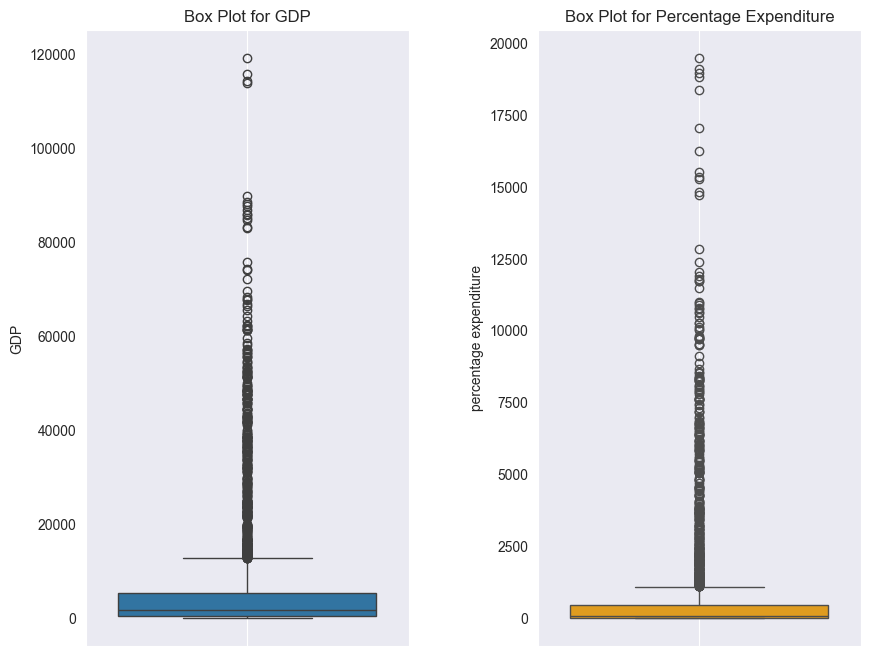

In [129]:
# Plotting GDP and Percentage Expenditure
# This will be useful in determining the type of method to use for outliers
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
# Plot GDP
sns.boxplot(data["GDP"], ax=axes[0])
axes[0].set_title("Box Plot for GDP")
axes[0].grid()
# Plot Percentage Expenditure
sns.boxplot(data["percentage expenditure"], ax=axes[1], color="Orange")
axes[1].set_title("Box Plot for Percentage Expenditure")
axes[1].grid()
plt.subplots_adjust(wspace=0.4)   # increase vertical space

In [130]:
# We can see that both features are skewed to the right
# This is expected as most countries have low GDP and Percentage Expenditure
# Therefore, to deal with the long tails, we will use IQR

# Combined mask for all conditions
combined_mask = np.ones(len(data), dtype=bool)
for feature in ["GDP", "percentage expenditure"]:
    # Get Q1 - 25th percentile
    q1 = np.quantile(data[feature], 0.25)
    # Get Q3 - 75th percentile
    q3 = np.quantile(data[feature], 0.75)
    # Calculate the Interquatile Range
    iqr = q3 - q1
    print(f"\nIQR value for column {feature} is: {iqr:.2f}")

    # Get the bounds
    lower_bound = q1 - 1.5 * iqr # Lower bound
    print(f"Lower bound: {lower_bound:.2f}")
    upper_bound = q3 + 1.5 * iqr # Upper bound
    print(f"Upper bound: {upper_bound:.2f}")

    # Selecting outliers
    feature_mask = (data[feature] >= lower_bound) & (data[feature] <= upper_bound)
    # Update combined mask
    combined_mask &= feature_mask
    # Select outliers based on values that do not meet the feature mask
    outliers = data[~feature_mask]
    # Calculating percentage
    outlier_percentage = len(outliers)/(len(outliers) + len(data)) * 100
    print(f"Outliers Percentage: {outlier_percentage:.2f}")

    # Dealing with outliers using capping
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)



IQR value for column GDP is: 4909.17
Lower bound: -6904.77
Upper bound: 12731.92
Outliers Percentage: 12.27

IQR value for column percentage expenditure is: 436.85
Lower bound: -650.59
Upper bound: 1096.81
Outliers Percentage: 11.69


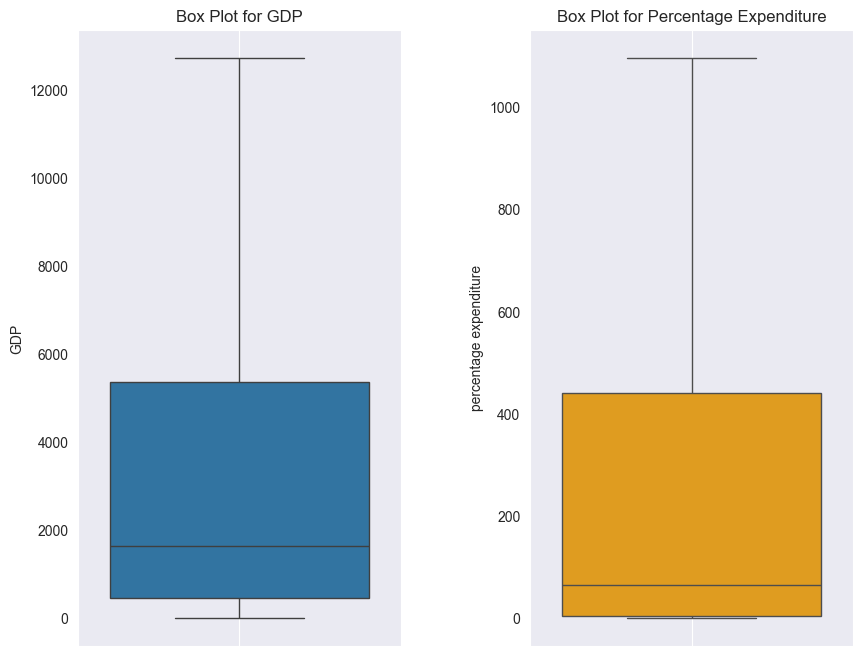

In [131]:
# Visualize the data after capping outliers
# Plotting GDP and Percentage Expenditure
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
# Plot GDP
sns.boxplot(data["GDP"], ax=axes[0])
axes[0].set_title("Box Plot for GDP")
axes[0].grid()
# Plot Percentage Expenditure
sns.boxplot(data["percentage expenditure"], ax=axes[1], color="Orange")
axes[1].set_title("Box Plot for Percentage Expenditure")
axes[1].grid()
plt.subplots_adjust(wspace=0.4)   # increase vertical space

In [132]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Question 3: Feature Engineering

In [133]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

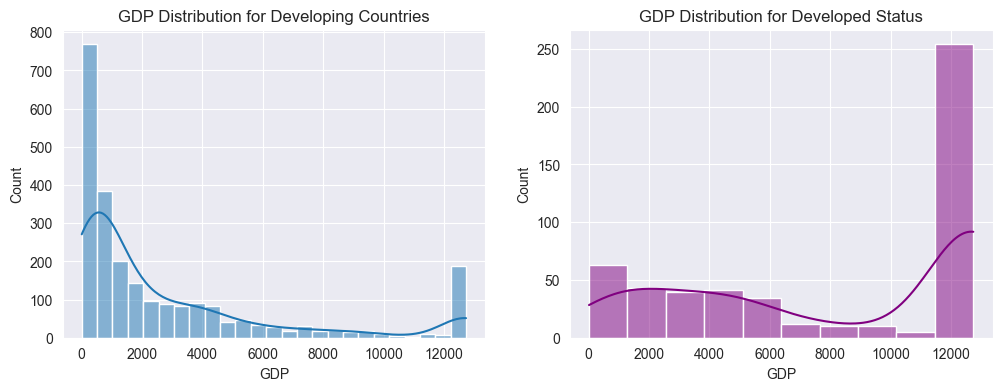

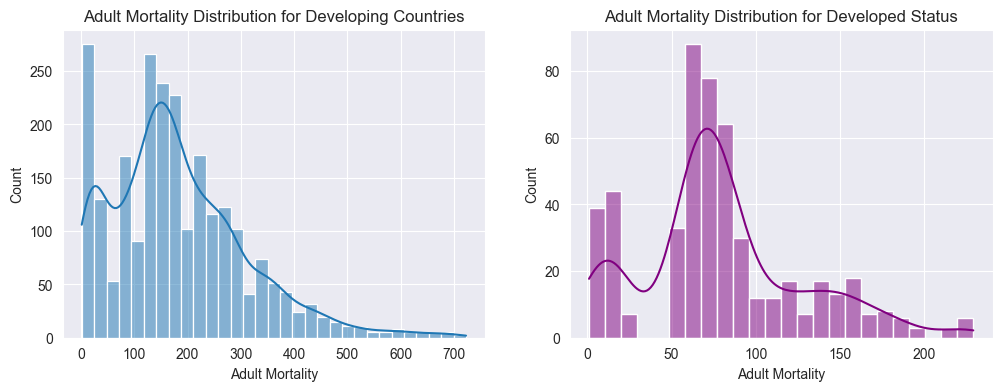

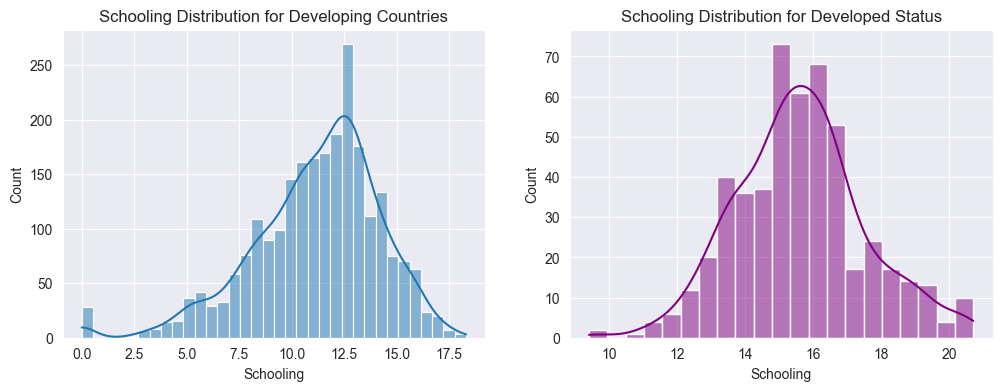

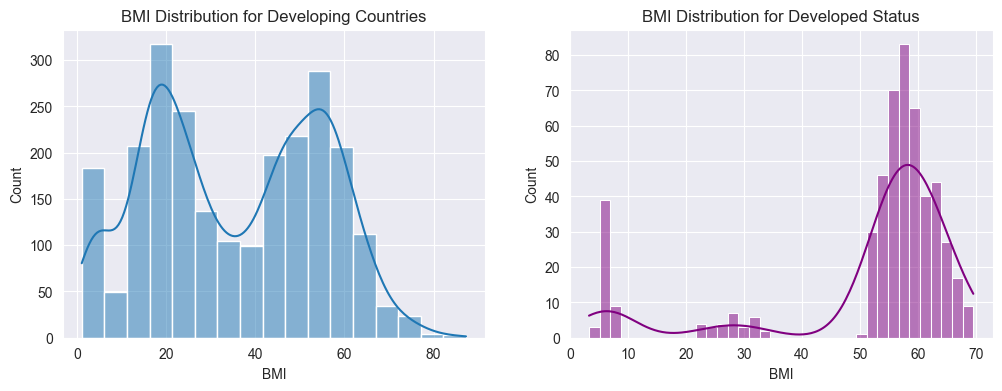

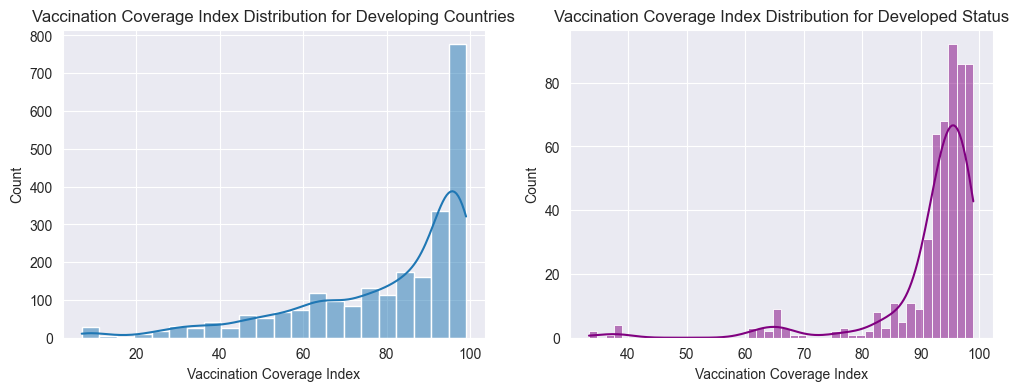

In [134]:
# Create new features
data["Infant Survival Rate"] = 1 - (data["infant deaths"]/1000)
data["Vaccination Coverage Index"] = (data["Hepatitis B"] + data["Polio"] + data["Diphtheria"])/3
data["Education Income Index"] = data["Schooling"] * data["Income composition of resources"]

# The independent variables that influence life expectancy
# High income - better healthcare, low adult mortality - longer life expectancy
# More education - better health habits, healthier BMI - low lifestyle diseases risk
# Higher vaccination - fewer preventable deaths
features = ["GDP", "Adult Mortality", "Schooling", "BMI", "Vaccination Coverage Index"]
# Plot histograms to compare developed and developing countries
for idx, feature in enumerate(features):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.set_style("darkgrid")
    sns.histplot(data[data["Status"] == "Developing"][feature], ax=axes[0], kde=True)
    axes[0].set_title(f"{feature} Distribution for Developing Countries")
    sns.histplot(data[data["Status"] == "Developed"][feature], ax=axes[1], color="Purple", kde=True)
    axes[1].set_title(f"{feature} Distribution for Developed Status")
    plt.show()


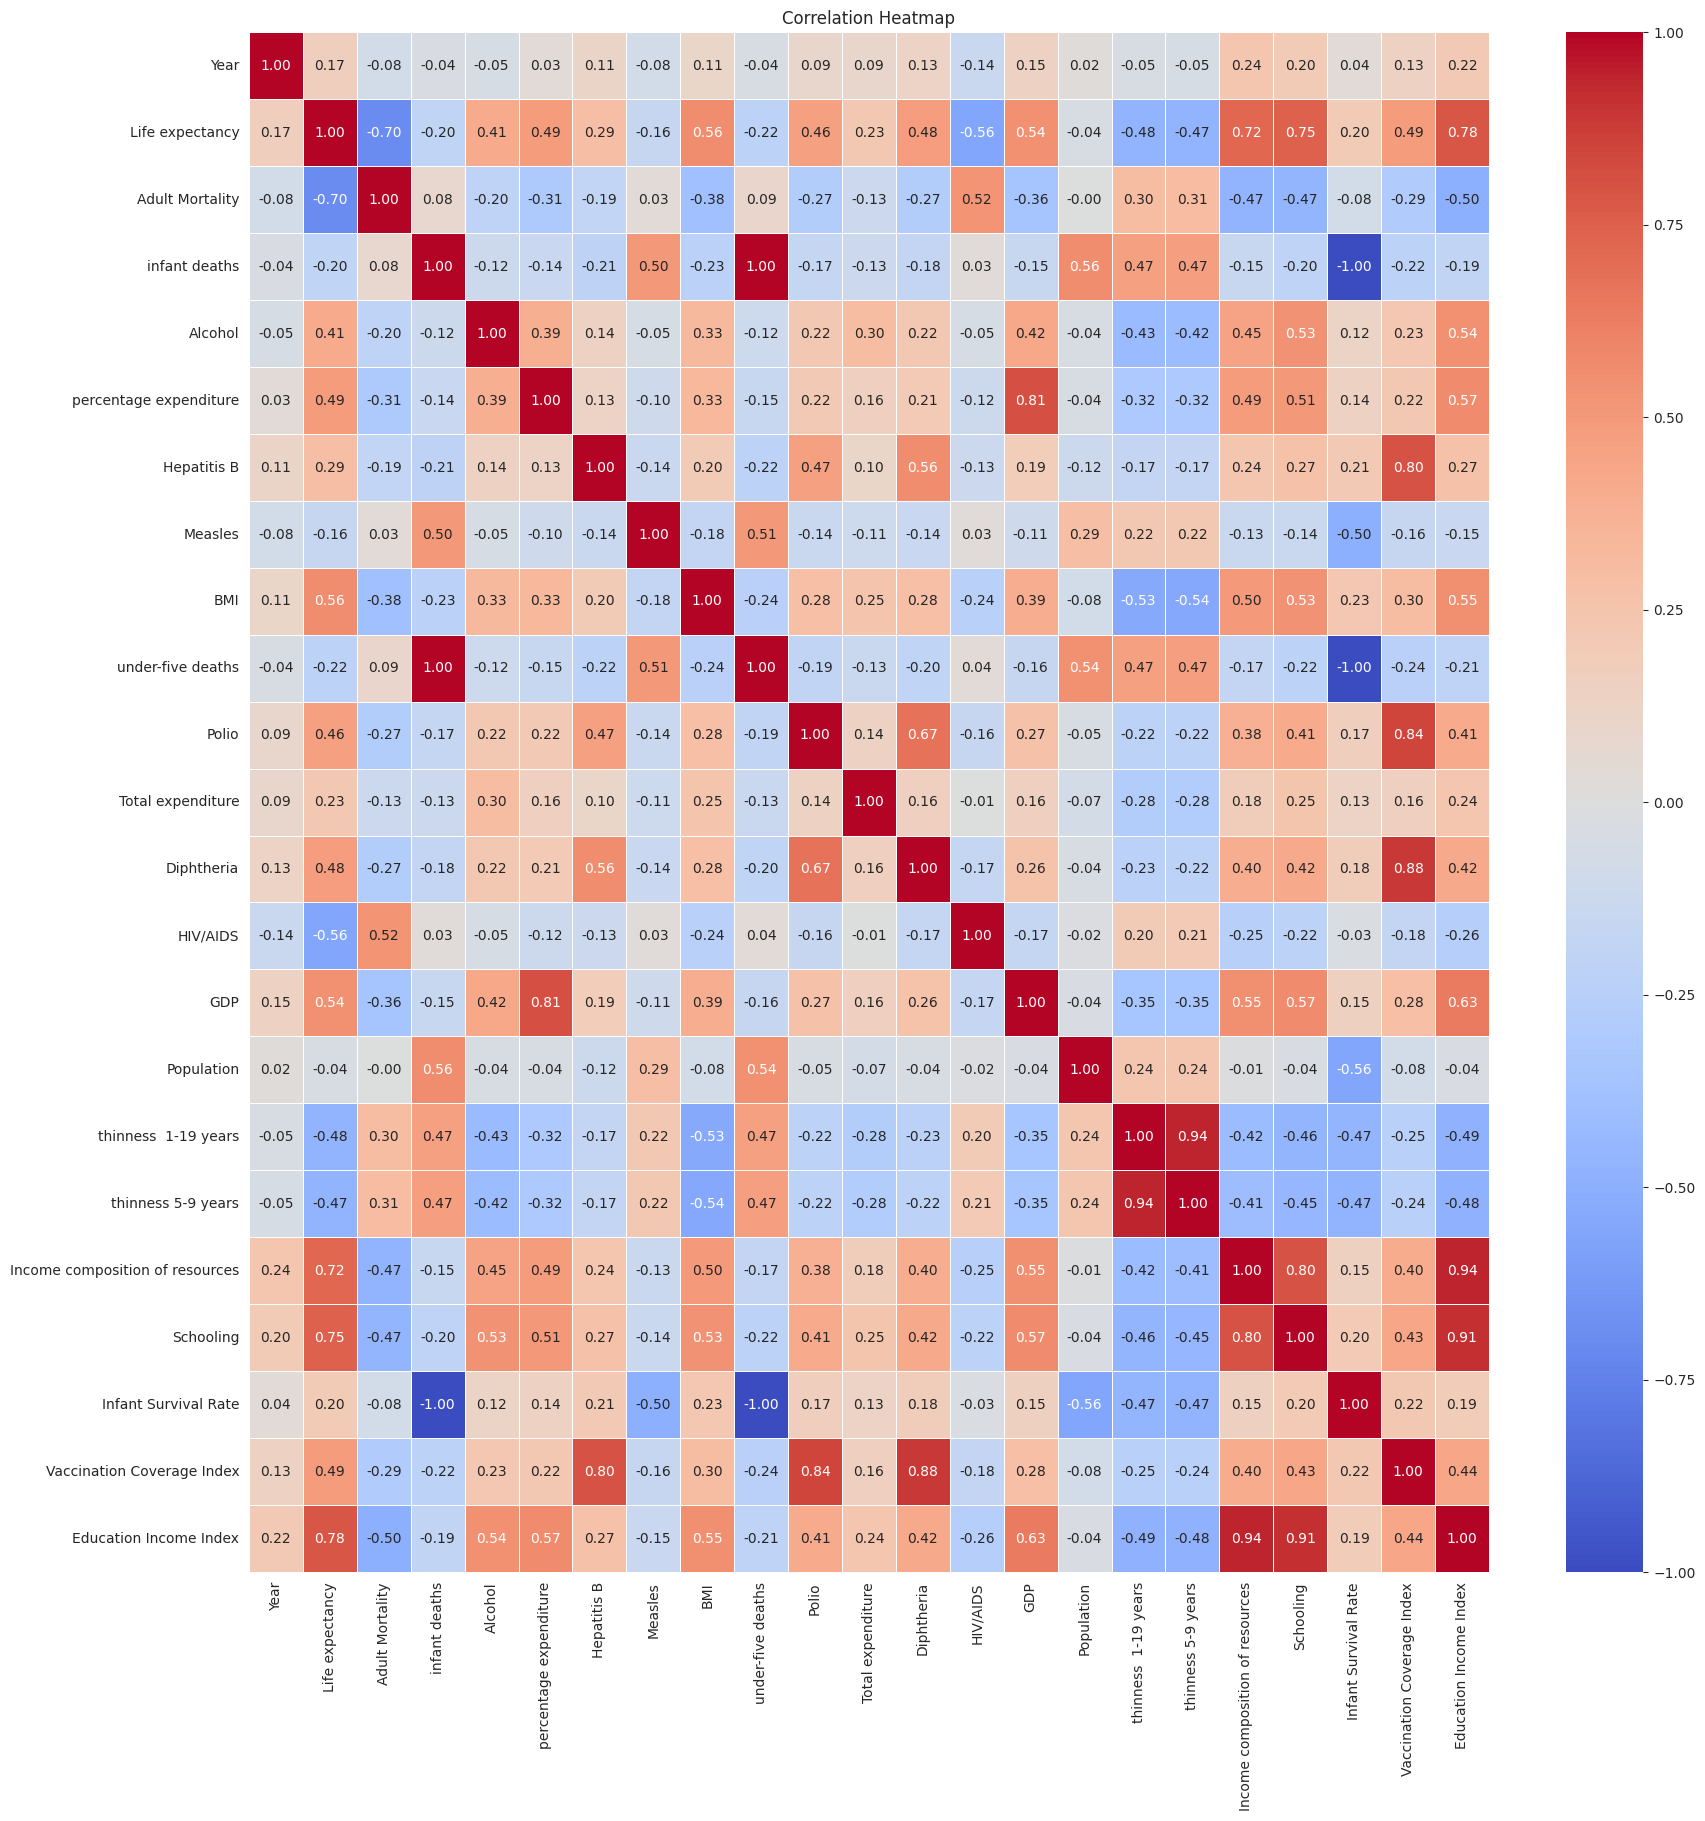

In [118]:
# Computing a correlation matrix
corr = data.drop(["Country", "Status"], axis=1).corr()
# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [119]:
# Identify the strongest correlations with Life Expectancy
life_corr = corr["Life expectancy"].sort_values(ascending=False)
print(life_corr)

Life expectancy                    1.000000
Education Income Index             0.781472
Schooling                          0.747191
Income composition of resources    0.722926
BMI                                0.562376
GDP                                0.544401
Vaccination Coverage Index         0.487260
percentage expenditure             0.486233
Diphtheria                         0.476678
Polio                              0.463514
Alcohol                            0.406501
Hepatitis B                        0.292985
Total expenditure                  0.225414
Infant Survival Rate               0.196771
Year                               0.171092
Population                        -0.039348
Measles                           -0.157769
infant deaths                     -0.196771
under-five deaths                 -0.222732
thinness 5-9 years                -0.469318
thinness  1-19 years              -0.475189
HIV/AIDS                          -0.556595
Adult Mortality                 

# Question 4: Data Transformation

In [120]:
# Encoding categorical variables
# Categorical variables that count -> Status
# Country does not provide meaningful information. Hence we will drop it
data = data.drop("Country", axis=1)
# Additionally, year is also not helpful in prediction
data = data.drop("Year", axis=1)
# Since there are only two categories in Status
# Developed and developing, we can use label encoding
le = LabelEncoder()
data["Status"] = le.fit_transform(data["Status"])
data.head()


,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Infant Survival Rate,Vaccination Coverage Index,Education Income Index
0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.938,45.333333,4.8379
1,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.936,60.666667,4.7600
2,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.934,63.333333,4.6530
3,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.931,67.000000,4.5374
4,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.929,68.000000,4.3130


In [121]:
# Check for skewed data in each column then tranform columns that are heavily skewed
# Highly skewed if skewness is greater than 1
transformed_data = data.copy()
transformed_columns = []
for column in data.columns:
  if column in ["Status", "Life expectancy"]:
    continue
  skewness = data[column].skew()
  if skewness > 1:
    transformed_columns.append(column)
    # Apply log1 transformation
    transformed_data[column] = np.log1p(data[column])
print(f"No. of transformed columns: {len(transformed_columns)}")
print(transformed_columns)

No. of transformed columns: 10
['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Measles', 'under-five deaths', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years']


In [122]:
transformed_data.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Infant Survival Rate,Vaccination Coverage Index,Education Income Index
0,1,65.0,5.575949,4.143135,0.01,4.280542,65.0,7.051856,19.1,4.430817,...,0.09531,6.372055,17.334091,2.901422,2.906901,0.479,10.1,0.938,45.333333,4.8379
1,1,59.9,5.605802,4.174387,0.01,4.311116,62.0,6.200509,18.6,4.465908,...,0.09531,6.419501,12.699497,2.917771,2.917771,0.476,10.0,0.936,60.666667,4.7600
2,1,59.9,5.594711,4.204693,0.01,4.307023,64.0,6.066108,18.1,4.499810,...,0.09531,6.450067,17.272826,2.928524,2.928524,0.470,9.9,0.934,63.333333,4.6530
3,1,59.5,5.609472,4.248495,0.01,4.371777,67.0,7.933080,17.6,4.543295,...,0.09531,6.508708,15.123021,2.939162,2.944439,0.463,9.8,0.931,67.000000,4.5374
4,1,59.2,5.620401,4.276666,0.01,2.091507,68.0,8.011023,17.2,4.584967,...,0.09531,4.167242,14.906964,2.954910,2.954910,0.454,9.5,0.929,68.000000,4.3130


In [123]:
# Scale the numerical data to one scale
# Prevents large values from overshadowing others with smaller values
# Scale just the numerical columns - Exclude categorical and target column
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(transformed_data.drop(["Status", "Life expectancy"], axis=1)),
                           columns=transformed_data.drop(["Status", "Life expectancy"], axis=1).columns)
data_scaled["Status"] = transformed_data["Status"]
data_scaled["Life expectancy"] = transformed_data["Life expectancy"]
data_scaled.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Infant Survival Rate,Vaccination Coverage Index,Education Income Index,Status,Life expectancy
0,0.818587,1.428097,-1.153499,0.177945,-0.676986,1.133900,-0.959349,1.398120,-3.276480,0.911887,...,1.273899,1.949715,1.929998,-0.702569,-0.555020,-0.268824,-1.845384,-0.774781,1,65.0
1,0.847427,1.446893,-1.153499,0.190155,-0.804406,0.872630,-0.984380,1.417818,-1.051049,0.920111,...,-0.591495,1.972725,1.945066,-0.716961,-0.585049,-0.285786,-1.072595,-0.793688,1,59.9
2,0.836713,1.465119,-1.153499,0.188521,-0.719459,0.831383,-1.009411,1.436848,-0.879862,0.899551,...,1.249240,1.987860,1.959971,-0.745744,-0.615078,-0.302749,-0.938196,-0.819658,1,59.9
3,0.850973,1.491463,-1.153499,0.214381,-0.592040,1.404339,-1.034442,1.461257,-0.665878,1.059921,...,0.383958,2.002833,1.982033,-0.779324,-0.645108,-0.328193,-0.753399,-0.847715,1,59.5
4,0.861531,1.508406,-1.153499,-0.696285,-0.549567,1.428259,-1.054467,1.484649,-0.623082,0.792637,...,0.296996,2.024998,1.996549,-0.822499,-0.735196,-0.345155,-0.703000,-0.902178,1,59.2


In [124]:
data_scaled.shape

(2938, 23)

In [125]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Adult Mortality,2938.0,6.336358e-16,1.000170,-3.898548,-0.397176,0.239703,0.676958,1.793201
infant deaths,2938.0,-3.627686e-17,1.000170,-1.063659,-1.063659,-0.229916,0.822084,3.444630
Alcohol,2938.0,-4.836914e-18,1.000170,-1.153499,-0.895476,-0.207206,0.751705,3.353380
percentage expenditure,2938.0,-1.209229e-16,1.000170,-1.531566,-0.837511,0.141120,0.901589,1.264436
Hepatitis B,2938.0,-2.297534e-17,1.000170,-3.395260,-0.226772,0.427312,0.639677,0.767096
Measles,2938.0,4.836914e-17,1.000170,-1.030248,-1.030248,-0.143220,0.777204,2.733829
BMI,2938.0,6.529835e-17,1.000170,-1.865473,-0.944330,0.244645,0.892950,2.454888
under-five deaths,2938.0,6.046143e-17,1.000170,-1.089025,-1.089025,-0.185601,0.801135,3.303062
Polio,2938.0,1.209229e-17,1.000170,-3.404871,-0.195114,0.446837,0.618024,0.703618
Total expenditure,2938.0,-1.257598e-16,1.000170,-2.291406,-0.658919,-0.075007,0.610679,4.793670


# Question 5: Model Training and Evaluation

In [126]:
# Split the dataset into training and testing sets - 80, 20
X = data_scaled.drop("Life expectancy", axis=1)
Y = data_scaled["Life expectancy"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Traning decision tree regressor, random forest, KNN and gradient boosting
# Setting configs for the different models
hyperparam_configs = {
    "DecisionTree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "max_depth": [10, 20],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 4]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 4]
        }
    },
    "KNN": {
        "model": KNeighborsRegressor(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
            "p": [2]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5],
            "min_samples_split": [2, 10],
            "min_samples_leaf": [1, 4]
        }
    }
}

best_models = {}
# Perform hyperparameter tuning for all the models
for model, config in hyperparam_configs.items():
    # Start the grid search, pass the model and configs
    # Specify the k value for cross-validation as 5
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=0
    )
    # Train the models using the different combinations of hyperparameters
    grid_search.fit(X_train, y_train)
    best_models[model] = grid_search.best_estimator_
    print(f"{model} best params: \n{grid_search.best_params_}")
    print(f"{model} best score: {grid_search.best_score_:.3f}\n")

DecisionTree best params: 
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
DecisionTree best score: 0.915

RandomForest best params: 
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest best score: 0.953

KNN best params: 
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNN best score: 0.904

GradientBoosting best params: 
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
GradientBoosting best score: 0.954



In [127]:
# Evaluating the best perfoming models on the test set
# Evaluation metrics - Root Mean Squared Error, Mean Absolute Error, R-Squared
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    # Evaluate the model's performance
    results[model_name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results)
print(results_df.T.round(3))



                   RMSE    MAE     R2
DecisionTree      2.738  1.798  0.913
RandomForest      1.722  1.125  0.966
KNN               2.618  1.847  0.921
GradientBoosting  1.771  1.206  0.964


# Question 6: Feature Importance

In [128]:
# Get the important features from Random Forest with the best score
rf_model = best_models["RandomForest"]
importances = rf_model.feature_importances_
feature_names = X_train.columns
# Dataframe with the column names
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(importance_df)

                            Feature  Importance
11                         HIV/AIDS    0.558241
16  Income composition of resources    0.197877
0                   Adult Mortality    0.133123
20           Education Income Index    0.023313
17                        Schooling    0.011648
6                               BMI    0.009671
2                           Alcohol    0.009610
15               thinness 5-9 years    0.009086
9                 Total expenditure    0.005820
7                 under-five deaths    0.005546
14             thinness  1-19 years    0.004479
12                              GDP    0.004253
5                           Measles    0.004059
8                             Polio    0.003229
10                       Diphtheria    0.002998
13                       Population    0.002970
18             Infant Survival Rate    0.002860
3            percentage expenditure    0.002681
19       Vaccination Coverage Index    0.002388
21                           Status    0

In [129]:
# Selecting the top 10 features
top_10_features = importance_df.head(10).drop("Importance", axis=1)
top_10_features = list(top_10_features["Feature"])
print(top_10_features)

['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'Education Income Index', 'Schooling', 'BMI', 'Alcohol', 'thinness 5-9 years', 'Total expenditure', 'under-five deaths']


In [130]:
X_train[top_10_features]

,HIV/AIDS,Income composition of resources,Adult Mortality,Education Income Index,Schooling,BMI,Alcohol,thinness 5-9 years,Total expenditure,under-five deaths
456,-0.052668,-0.112511,0.111653,-0.210266,-0.014491,-0.638951,0.176358,0.946241,-0.675367,-1.089025
462,0.101149,-0.304400,0.291585,-0.448557,-0.284755,-0.809162,-0.194588,1.133266,-0.309394,-1.089025
2172,-0.541994,0.515924,0.233017,0.345996,0.285802,0.312229,1.475934,0.212220,0.673388,-1.089025
2667,-0.541994,0.453560,-2.018660,0.619844,0.826330,1.053149,-0.830497,0.656038,0.541802,-0.310858
381,-0.541994,0.933282,-0.158691,0.697996,0.405919,-0.513796,-1.123217,0.617530,-1.045453,-1.089025
...,...,...,...,...,...,...,...,...,...,...
1638,-0.541994,0.962065,-0.612748,1.018079,0.856360,1.488689,0.587681,-1.364004,1.504024,-1.089025
1095,1.855981,-1.057563,0.902647,-1.074137,-0.915372,-0.759100,-0.345995,0.930752,0.311527,0.078225
1130,1.042136,-0.803310,0.829504,-1.015232,-1.065518,-1.680243,0.378234,0.185815,-0.157248,0.694908
1294,-0.541994,1.034024,-0.423287,1.194430,1.036536,0.938006,1.190785,-1.537506,0.915999,-0.310858


In [131]:
# Retrain the models using the top 10 selected features
# Train and evaluate the models
retraining_results = {}
for model_name, model in best_models.items():
    model.fit(X_train[top_10_features], y_train)
    y_pred = model.predict(X_test[top_10_features])
    # Evaluate the model's performance
    retraining_results[model_name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

retraining_results_df = pd.DataFrame(retraining_results)
print(retraining_results_df.T)

                      RMSE       MAE        R2
DecisionTree      2.673815  1.775041  0.917480
RandomForest      1.668011  1.072218  0.967886
KNN               2.124944  1.354662  0.947882
GradientBoosting  1.730630  1.149554  0.965430


In [132]:
# Combining results to a single table
# First change the suffixes
results_df.index = results_df.index + "_Original"
retraining_results_df.index = retraining_results_df.index + "_Retrained"

# Concatenate the results
comparison_df = pd.concat([results_df, retraining_results_df])
comparison_df # All the model's performances improved

,DecisionTree,RandomForest,KNN,GradientBoosting
RMSE_Original,2.738373,1.722200,2.618176,1.770947
MAE_Original,1.798181,1.125089,1.846534,1.205546
R2_Original,0.913447,0.965766,0.920879,0.963800
RMSE_Retrained,2.673815,1.668011,2.124944,1.730630
MAE_Retrained,1.775041,1.072218,1.354662,1.149554
R2_Retrained,0.917480,0.967886,0.947882,0.965430


# Question 7: Feature Importance - Continued

In [134]:
# Get the important features from Random Forest with the best score
rf_model = best_models["RandomForest"]
importances = rf_model.feature_importances_
feature_names = top_10_features
# Dataframe with the column names
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(importance_df)

                           Feature  Importance
0                         HIV/AIDS    0.560461
1  Income composition of resources    0.200572
2                  Adult Mortality    0.137409
3           Education Income Index    0.025077
7               thinness 5-9 years    0.014900
6                          Alcohol    0.013866
4                        Schooling    0.013813
5                              BMI    0.012625
9                under-five deaths    0.012387
8                Total expenditure    0.008890


In [135]:
# The best performing model is the Random Forest that was retrained with
# the top 10 most important features
# Extracting the most important features from it
rf_model = best_models["RandomForest"]
importances = rf_model.feature_importances_
# Dataframe with the column names
importance_df = pd.DataFrame({
    "Feature": top_10_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(importance_df.head(5))


                           Feature  Importance
0                         HIV/AIDS    0.560461
1  Income composition of resources    0.200572
2                  Adult Mortality    0.137409
3           Education Income Index    0.025077
7               thinness 5-9 years    0.014900
